## 딥러닝을 이용한 이미지 분류 

In [2]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt 
import sys 
import pandas as pd 
import numpy as np 
import koreanize_matplotlib
import seaborn as sns 

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping

import os 

In [3]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
X_test.shape

(10000, 28, 28)

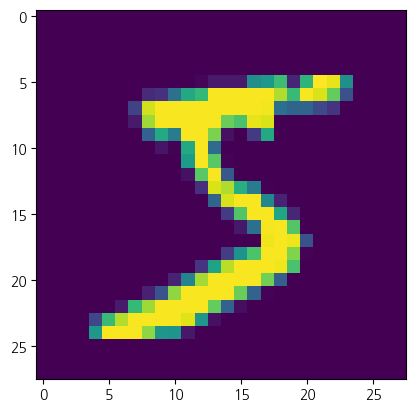

In [6]:
plt.imshow(X_train[0])

In [7]:
# 컴퓨터는 어떻게 이미지를 인식하는지? 
for x in X_train[0]:

    for i in x:
        sys.stdout.write("%-3s"% i)
    sys.stdout.write('\n')

0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  3  18 18 18 12613617526 1662552471270  0  0  0  
0  0  0  0  0  0  0  0  30 36 94 15417025325325325325322517225324219564 0  0  0  0  
0  0  0  0  0  0  0  49 23825325325325325325325325325193 82 82 56 39 0  0  0  0  0  
0  0  0  0  0  0  0  18 2192532532532532531981822472410  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  80 15610725325320511 0  43 1540  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  14 1  15425390 0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  1392531902  0  0  0  0  0  0  0 

In [8]:
# 차원 변환 과정 보기 
X_train = X_train.reshape(X_train.shape[0],784)

In [9]:
X_train.shape

(60000, 784)

## 케라스 
* 이미지 분석시 데이터를 0에서 1사이의 값으로 변환해야 분석이 잘됨
* 이미지 분석을 할 때 필요한 작업은 255로 나누어주는 작업이 필수
* 데이터 정규화 작업(normalization)이라고 한다.
* 왜 255개로 나누는가? 컬러는 0-255개이기 때문

In [10]:
X_train = X_train.astype("float64")
X_train = X_train / 255 
# 정규화 작업 

X_test = X_test.reshape(X_test.shape[0],784)
X_test = X_test.astype("float64")
X_test = X_test / 255

In [11]:
X_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [12]:
# 타겟이 카테고리형이어야 하기 때문에 숫자로 된 타겟 컬럼을 원 핫 인코딩을 해줘야한다 (범주형 숫자로 변형)
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10) # 10개의 범주형 숫자로 변형 

In [13]:
y_train[150]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

## 딥러닝을 이용한 mnist 손글씨 분석 

In [14]:
model = Sequential()
model.add(Dense(512,input_dim=X_train.shape[1],activation="relu")) # Dense는 사용자 임의 지정이지만 보통 2의 배수로 지정시킴 
model.add(Dense(10,activation="softmax"))

model.compile(loss="categorical_crossentropy",optimizer ="adam",metrics=["accuracy"])


In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


## 모델 최적화를 위한 설정 저장

In [16]:
model_dir = "./deep_model/"

if not os.path.exists(model_dir):
    od.mkdir(model_dir)

modelpath = "./deep_model/MINIST_MLP.hdf5"
checkpointer = ModelCheckpoint(filepath = modelpath,monitor="val_loss",verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor="val_loss",patience=10)


In [17]:
history = model.fit(X_train,y_train,validation_split=0.25,epochs=30,batch_size=200,verbose=0 ,
                   callbacks=[early_stopping_callback,checkpointer])


Epoch 1: val_loss improved from inf to 0.18781, saving model to ./deep_model\MINIST_MLP.hdf5

Epoch 2: val_loss improved from 0.18781 to 0.13691, saving model to ./deep_model\MINIST_MLP.hdf5

Epoch 3: val_loss improved from 0.13691 to 0.11931, saving model to ./deep_model\MINIST_MLP.hdf5

Epoch 4: val_loss improved from 0.11931 to 0.09693, saving model to ./deep_model\MINIST_MLP.hdf5

Epoch 5: val_loss improved from 0.09693 to 0.09047, saving model to ./deep_model\MINIST_MLP.hdf5

Epoch 6: val_loss improved from 0.09047 to 0.08394, saving model to ./deep_model\MINIST_MLP.hdf5

Epoch 7: val_loss improved from 0.08394 to 0.08287, saving model to ./deep_model\MINIST_MLP.hdf5

Epoch 8: val_loss did not improve from 0.08287

Epoch 9: val_loss improved from 0.08287 to 0.08189, saving model to ./deep_model\MINIST_MLP.hdf5

Epoch 10: val_loss did not improve from 0.08189

Epoch 11: val_loss improved from 0.08189 to 0.07918, saving model to ./deep_model\MINIST_MLP.hdf5

Epoch 12: val_loss impr

In [18]:
X_test.shape

(10000, 784)

In [19]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0692 - accuracy: 0.9817


[0.06920810788869858, 0.9817000031471252]

In [20]:
y_val_loss = history.history['val_loss']
y_loss = history.history['loss']

In [21]:
y_val_loss

[0.18781378865242004,
 0.13691096007823944,
 0.11931060254573822,
 0.09692687541246414,
 0.09046956896781921,
 0.0839417427778244,
 0.08287002891302109,
 0.08354852348566055,
 0.08188819885253906,
 0.08237108588218689,
 0.07918046414852142,
 0.07821919769048691,
 0.08007930964231491,
 0.08351213485002518,
 0.08069789409637451,
 0.0815582275390625,
 0.08205777406692505,
 0.08370493352413177,
 0.08584035187959671,
 0.08607368916273117,
 0.08711718767881393,
 0.08902940154075623]

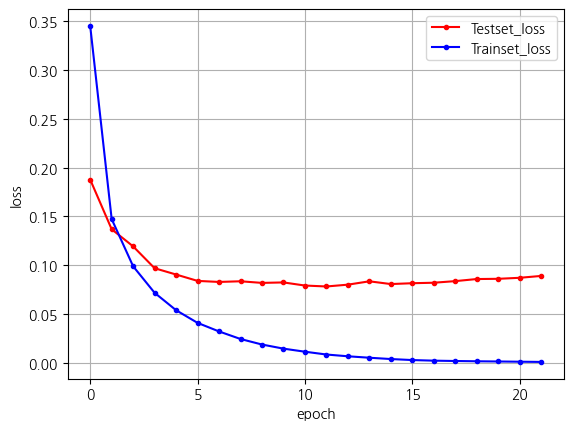

In [22]:
x_len = np.arange(len(y_loss))

plt.plot(x_len,y_val_loss,marker=".",c="red",label="Testset_loss")
plt.plot(x_len,y_loss,marker=".",c="blue",label="Trainset_loss")
plt.legend(loc="upper right")
plt.grid()
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

# 각 구간별 점이 찍혀서 나온다

## 합성곱 신경망 (Convolutional Neural Network)
* CNN은 입련된 이미지에서 다시 한 번 특징을 추출해내기 위하여 커널(필터)을 이용하는 방법 

## 구동원리 
-----

![이미지](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Ft1.daumcdn.net%2Fcfile%2Ftistory%2F993E80355C62DA441D)

----

* 행과 열이 이동하면서 계산 
* 왜? → 이미지 출력시 0,1 과정에서 0이 불필요하게 많기에 깔끔하게 제거 시키기 위해서


-----
![이미지2](https://blog.kakaocdn.net/dn/bkZvKX/btqBFMSuybU/u6qWG3fwCyeSGAFlAiC7jK/img.png)


----

![이미지3](https://blog.kakaocdn.net/dn/brllFX/btq7CGO2HUl/UijveTiTYJBzxkBWcLLKjk/img.gif)

* (중요!) 픽셀을 돌아다니면서 값을 조정

In [23]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

In [24]:
X_train = X_train.reshape(X_train.shape[0],28,28,1).astype('float32') / 255 
X_test = X_test.reshape(X_test.shape[0],28,28,1).astype('float32') / 255 
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# 데이터셋 준비 완료 
## 컨볼루션 신경망 설정 

In [25]:
# 컨볼루션 임포트 
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dropout # 컨볼루션  2D

In [26]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),input_shape=(28,28,1),activation="relu"))
model.add(Conv2D(64,(3,3),activation="relu")) # 행열 줄여주기 
model.add(MaxPooling2D(pool_size=(2,2))) # 행열 줄여주기 
model.add(Dropout(0.25)) # 과적합 방지를 위한 단순화
model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(10,activation="softmax"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               1179776   
                                                      

In [27]:
# 모델 최적화

model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])
model_dir = "./deep_model/"

if not os.path.exists(model_dir):
    od.mkdir(model_dir)

modelpath = "./deep_model/MINIST_CNN.hdf5"
checkpointer = ModelCheckpoint(filepath = modelpath,monitor="val_loss",verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor="val_loss",patience=10)

In [28]:
import tensorflow as tf 
# 지금 텐서가 어디에 할당 되었는지 확인하기
print(tf.debugging.set_log_device_placement(True))
# GPU를 안써서 시간이 좀 걸렸던 듯 

None


In [29]:

# 모델 훈련 
history = model.fit(X_train,y_train,validation_split=0.25,epochs=30,batch_size=200,verbose=0 ,
                   callbacks=[early_stopping_callback,checkpointer])


Epoch 1: val_loss improved from inf to 0.07753, saving model to ./deep_model\MINIST_CNN.hdf5

Epoch 2: val_loss improved from 0.07753 to 0.05902, saving model to ./deep_model\MINIST_CNN.hdf5

Epoch 3: val_loss improved from 0.05902 to 0.04945, saving model to ./deep_model\MINIST_CNN.hdf5

Epoch 4: val_loss improved from 0.04945 to 0.04411, saving model to ./deep_model\MINIST_CNN.hdf5

Epoch 5: val_loss did not improve from 0.04411

Epoch 6: val_loss improved from 0.04411 to 0.04138, saving model to ./deep_model\MINIST_CNN.hdf5

Epoch 7: val_loss did not improve from 0.04138

Epoch 8: val_loss did not improve from 0.04138

Epoch 9: val_loss did not improve from 0.04138

Epoch 10: val_loss did not improve from 0.04138

Epoch 11: val_loss did not improve from 0.04138

Epoch 12: val_loss did not improve from 0.04138

Epoch 13: val_loss improved from 0.04138 to 0.04001, saving model to ./deep_model\MINIST_CNN.hdf5

Epoch 14: val_loss did not improve from 0.04001

Epoch 15: val_loss did not

In [30]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.0380 - accuracy: 0.9911


[0.038038868457078934, 0.991100013256073]

In [31]:
y_val_loss = history.history['val_loss']
y_loss = history.history['loss']

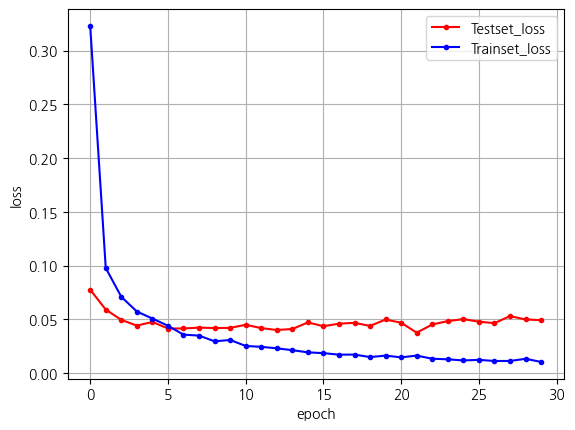

In [32]:
x_len = np.arange(len(y_loss))

plt.plot(x_len,y_val_loss,marker=".",c="red",label="Testset_loss")
plt.plot(x_len,y_loss,marker=".",c="blue",label="Trainset_loss")
plt.legend(loc="upper right")
plt.grid()
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()